In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('C:/Users/regi_/Downloads/train.csv')
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
#If a column has too many missing values, it is not reliable to use it to predict sales price. 
#Therefore, I'm dropping the columns where NaNs are more than 20% of the values 
nulls = train.isna().sum()*100/len(train)
missing_values = pd.DataFrame({'column_name': train.columns, 'percent_missing': nulls})
missing_values = missing_values[missing_values['percent_missing'] > 20 ]
missing_values

,column_name,percent_missing
Alley,Alley,93.767123
FireplaceQu,FireplaceQu,47.260274
PoolQC,PoolQC,99.520548
Fence,Fence,80.753425
MiscFeature,MiscFeature,96.301370


In [4]:
#same principle applies to the columns where the values are zeros
#zero often mean it is a categorical value and a feature is not present in a property
zeros = (train == 0).sum()*100/len(train)
missing_values1 = pd.DataFrame({'column_name': train.columns, 'percent_missing': zeros})
missing_values1 = missing_values1[missing_values1['percent_missing'] > 20 ]
missing_values1

,column_name,percent_missing
MasVnrArea,MasVnrArea,58.972603
BsmtFinSF1,BsmtFinSF1,31.986301
BsmtFinSF2,BsmtFinSF2,88.561644
2ndFlrSF,2ndFlrSF,56.780822
LowQualFinSF,LowQualFinSF,98.219178
BsmtFullBath,BsmtFullBath,58.630137
BsmtHalfBath,BsmtHalfBath,94.383562
HalfBath,HalfBath,62.534247
Fireplaces,Fireplaces,47.260274
WoodDeckSF,WoodDeckSF,52.123288


In [5]:
cols = list(missing_values.index) + list(missing_values1.index)
for i in cols:
    train = train.drop(i, axis = 1)

train.columns #separate numerical and categorical data into two dataframes

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', 'GrLivArea',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [6]:
#instead of Year Built and Year Remodeled, I calculated the time since the house was built and remodeled
train["AgeBuilt"] = 2019 - train["YearBuilt"] 
train["AgeRemodAdd"] = 2019 - train["YearRemodAdd"]

In [7]:
#categorical
train_cat = train[['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'KitchenAbvGr', 
                   'SaleCondition', 'MoSold', 'YrSold', 'SaleType', 'PavedDrive',
                   'GarageCond', 'GarageQual', 'GarageType',
                   'GarageFinish', 'GarageYrBlt', 'Electrical', 'FullBath', 'KitchenQual', 'Functional', 
                   'BedroomAbvGr', 'CentralAir', 'Heating', 'HeatingQC', 'BsmtExposure',
                   'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'Utilities', 'LotConfig', 'LandContour', 
                   'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 
                   'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                   'ExterQual', 'ExterCond', 'Foundation']]

In [8]:
#numerical
train_num = train[['SalePrice', 'AgeBuilt', 'AgeRemodAdd', 'GrLivArea', 'OverallQual', 'TotRmsAbvGrd', 
                   'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'GarageCars', 'BsmtUnfSF', 'LotFrontage', 'LotArea']]

'''In the next step I am dropping the categorical columns which won't help me predict the sale price of a house. 
I went through each category, read category descriptions, performed analysis with the code below, and used common sense. 
I dropped the columns with little data variation, repetitive, or exhausted by other categories columns, and with 
insignificant feature presence'''

In [3]:
#example of columns analysis with LandSlope column
print(train["LandSlope"].unique())
print((train["LandSlope"].value_counts()))
#not much data variation in a columns itself, thus we cannot predict its affect on sale price

['Gtl' 'Mod' 'Sev']
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


In [ ]:
train["LandSlope"].hist()

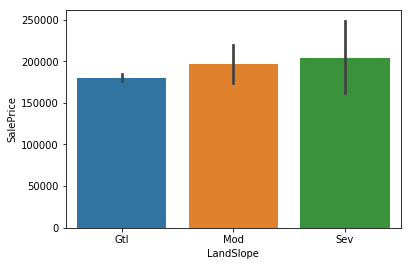

In [5]:
sns.barplot(x="LandSlope", y="SalePrice", data=train) 
#not much variation between the sale price values depending on LandSlope

In [16]:
train_cat_new = train_cat.drop(['Id', 'Street', 'LotShape', 'KitchenAbvGr', 'SaleCondition', 'MoSold', 'YrSold', 
                                'SaleType', 'PavedDrive', 'GarageCond', 'GarageFinish', 'GarageYrBlt', 'Electrical', 
                                'FullBath', 'Functional', 'BedroomAbvGr', 'CentralAir', 'Heating', 'BsmtExposure',
                                'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'Utilities', 'LotConfig', 'LandContour', 
                                'LandSlope', 'Condition1', 'Condition2', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                'RoofStyle', 'RoofMatl', 'Exterior2nd', 'MasVnrType', 'ExterCond'], axis = 1)

In [17]:
train_cat_new.columns

Index(['MSSubClass', 'MSZoning', 'GarageQual', 'GarageType', 'KitchenQual',
       'HeatingQC', 'BsmtQual', 'Neighborhood', 'BldgType', 'HouseStyle',
       'Exterior1st', 'ExterQual', 'Foundation'],
      dtype='object')

In [ ]:
# Now to numerical values

In [18]:
#Checking the correlation between the numerican value and sale price. If < 0.40, i'm dropping them. 
abs(train_num.corr()['SalePrice']).sort_values(ascending = False)[1:]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
TotRmsAbvGrd    0.533723
AgeBuilt        0.522897
AgeRemodAdd     0.507101
LotFrontage     0.351799
LotArea         0.263843
BsmtUnfSF       0.214479
Name: SalePrice, dtype: float64

In [19]:
train_num = train_num.drop(["LotFrontage", "LotArea", "BsmtUnfSF"], axis = 1)

In [20]:
train_num.isna().sum() #checking for null values

SalePrice       0
AgeBuilt        0
AgeRemodAdd     0
GrLivArea       0
OverallQual     0
TotRmsAbvGrd    0
TotalBsmtSF     0
1stFlrSF        0
GarageArea      0
GarageCars      0
dtype: int64

In [21]:
#performing PCA on numeric dataframe

In [22]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(train_num)
scaled = transformer.transform(train_num)
scaled = pd.DataFrame(scaled)
scaled.columns = train_num.columns
scaled.head()

,SalePrice,AgeBuilt,AgeRemodAdd,GrLivArea,OverallQual,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF,GarageArea,GarageCars
0,0.347273,-1.050994,-0.878668,0.370333,0.651479,0.912210,-0.459303,-0.793434,0.351000,0.311725
1,0.007288,-0.156734,0.429577,-0.482512,-0.071836,-0.318683,0.466465,0.257140,-0.060731,0.311725
2,0.536154,-0.984752,-0.830215,0.515013,0.651479,-0.318683,-0.313369,-0.627826,0.631726,0.311725
3,-0.515281,1.863632,0.720298,0.383659,0.651479,0.296763,-0.687324,-0.521734,0.790804,1.650307
4,0.869843,-0.951632,-0.733308,1.299326,1.374795,1.527656,0.199680,-0.045611,1.698485,1.650307


In [23]:
from statsmodels.multivariate.pca import PCA
pc = PCA(np.array(scaled), ncomp=13, standardize = False, demean= False, normalize = False)
pc.factors

c:\users\regi_\appdata\local\programs\python\python37\lib\site-packages\statsmodels\multivariate\pca.py:229: ValueWarning: The requested number of components is more than can be computed from data. The maximum number of components is the minimum of the number of observations or variables
  warnings.warn(warn, ValueWarning)


array([[-1.05479711e+00, -6.61458805e-01, -1.56872086e+00, ...,
        -2.34518622e-01, -1.47853590e-03,  2.16615367e-01],
       [ 1.69724567e-02, -2.18324187e-01,  7.77082506e-01, ...,
        -1.12895230e-01,  2.88871440e-01, -2.12796244e-01],
       [-1.01930124e+00, -1.15006316e+00, -9.05860290e-01, ...,
         1.57445076e-03, -6.17014034e-01,  9.74289702e-02],
       ...,
       [-9.29493332e-01,  1.90359516e+00, -1.24686219e+00, ...,
        -3.64210546e-01, -4.60418651e-02, -1.42516333e-02],
       [ 1.80087251e+00, -3.23539236e-01,  5.72895838e-01, ...,
        -2.20366131e-01,  5.08369267e-02, -1.18318916e-01],
       [ 1.42570938e+00,  6.10734171e-01,  1.11379815e+00, ...,
        -1.85202176e-01,  5.91300803e-02,  3.05744388e-02]])

In [24]:
#numerical dataframe that eventually will be concatenated with a categorial df
data_new = pd.DataFrame(np.dot(scaled, pc.eigenvecs)) 
data_new.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.054797,-0.661459,-1.568721,0.236957,-0.139428,-0.461048,-0.225224,-0.234519,-0.001479,0.216615
1,0.016972,-0.218324,0.777083,-0.246991,-0.247272,-0.127181,-0.040685,-0.112895,0.288871,-0.212796
2,-1.019301,-1.150063,-0.905860,0.073742,-0.276241,0.089993,0.253066,0.001574,-0.617014,0.097429
3,-0.007723,0.853033,-0.827055,-2.104417,0.017572,1.395626,-0.843231,0.235719,0.144924,-0.659285
4,-3.252419,-0.106131,-1.415850,-0.915958,-0.117892,-0.186725,-0.477788,-0.148134,-0.140906,0.101886


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

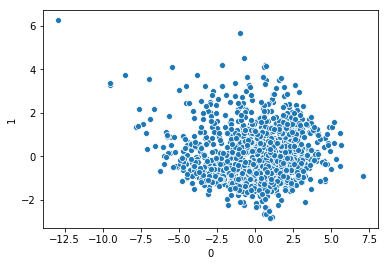

In [26]:
sns.scatterplot(data_new[0], data_new[1], data= data_new) 

In [27]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca = PCA()
pca.fit(scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
variations = pca.explained_variance_ratio_*100
variations = np.round(variations, decimals=1)
variations

array([54.8, 14.2,  9.7,  8. ,  3.9,  3.4,  1.9,  1.6,  1.3,  1.1])

In [29]:
plot_labels = ['PC' + str(i) for i in range(1, len(variations)+1)]

Text(0.5, 1.0, 'PCA Scree Plot')

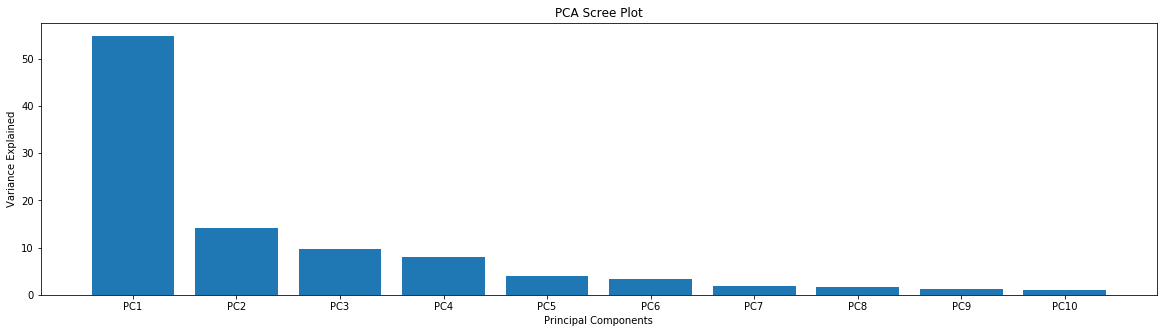

In [30]:
from matplotlib.pyplot import figure
figure(figsize=(20,5))
plt.bar(x = plot_labels, height=variations)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('PCA Scree Plot')

In [31]:
#now we move on to the categorical values

In [32]:
train_cat_new.columns

Index(['MSSubClass', 'MSZoning', 'GarageQual', 'GarageType', 'KitchenQual',
       'HeatingQC', 'BsmtQual', 'Neighborhood', 'BldgType', 'HouseStyle',
       'Exterior1st', 'ExterQual', 'Foundation'],
      dtype='object')

In [33]:
train_cat_new = train_cat_new.fillna(0) #filling with zeros the NaN values. 

In [34]:
train_cat_new = train_cat_new.astype('category')

In [35]:
pd.set_option('display.max_columns', None)
a = pd.get_dummies(train_cat_new)
a.head(10)

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,GarageQual_0,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageType_0,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtQual_0,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [36]:
q = pd.concat([data_new, a], axis = 1, join='inner', ignore_index=True)
q

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,-1.054797,-0.661459,-1.568721,0.236957,-0.139428,-0.461048,-0.225224,-0.234519,-0.001479,0.216615,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,0.016972,-0.218324,0.777083,-0.246991,-0.247272,-0.127181,-0.040685,-0.112895,0.288871,-0.212796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,-1.019301,-1.150063,-0.905860,0.073742,-0.276241,0.089993,0.253066,0.001574,-0.617014,0.097429,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,-0.007723,0.853033,-0.827055,-2.104417,0.017572,1.395626,-0.843231,0.235719,0.144924,-0.659285,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
4,-3.252419,-0.106131,-1.415850,-0.915958,-0.117892,-0.186725,-0.477788,-0.148134,-0.140906,0.101886,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
5,0.850162,-1.441460,-0.441563,-0.326139,0.355156,-0.418522,0.357511,-0.107965,-0.494731,-0.378950,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
6,-3.053832,-0.445724,0.814418,0.878357,-0.259898,0.205002,0.175982,-0.049224,0.257440,0.443128,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
7,-0.740268,0.676688,-0.390888,-0.206003,-0.770153,0.032885,-0.121233,0.083180,-0.522457,-0.379070,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8,0.488680,1.776953,-0.426405,-1.100729,-0.879274,0.407272,-1.021644,0.072220,0.081200,-0.218699,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
9,2.691072,0.751034,1.079479,0.010165,-0.677652,0.160771,0.064808,0.032317,0.110190,-0.224201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [37]:
np.random.seed(3)

In [38]:
from sklearn.model_selection import train_test_split
y = train['SalePrice']
q_train, q_test, y_train, y_test = train_test_split(q, y, test_size=0.3)

In [39]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(q_train,y_train)
predictions  = lm.predict(q_test)

In [40]:
pd.DataFrame({'observed':y_test, 'predicted':predictions}).head(10)

,observed,predicted
140,115000,115000.0
950,129000,129000.0
248,180000,180000.0
1360,189000,189000.0
568,316600,316600.0
1325,55000,55000.0
1083,160000,160000.0
784,128000,128000.0
1183,120000,120000.0
1407,112000,112000.0


In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", math.sqrt(mean_squared_error(y_test, predictions)))
print("R2:", r2_score(y_test, predictions))

MSE: 0.0002347740463347563
RMSE: 0.015322338148427489
R2: 0.9999999999999561


In [42]:
#the second way of fitting the model, without the separation between test and train
X = pd.DataFrame(data= q)
Y = pd.DataFrame(data= train, columns=['SalePrice'])
model = lm.fit(X,Y)
predictions  = lm.predict(X)

In [43]:
print("MSE:", mean_squared_error(Y, predictions))
print("RMSE", math.sqrt(mean_squared_error(Y, predictions)))
print("R2:", r2_score(Y, predictions))

MSE: 4.406166764492875e-21
RMSE 6.637896326768651e-11
R2: 1.0


In [44]:
#Conclusion: our prediction model works. The factors we chose do affect the sale price. 